In [92]:
import pandas as pd
import re
from IPython.display import clear_output
import sys
import matplotlib.pyplot as plt
import seaborn as se
import numpy as np
import plotly.express as px

In [93]:
df =  pd.read_csv('agg_data (1).csv')
df

,company,position,location,schedule,responsibilities,requirements,levels,techstack,source,date_publish,format,salary,currency
0,Сбербанк,Аналитик данных,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['sql', 'python', 'oracle', 'субд', 'greenplum...",superjob.ru,2022-12-25 10:50:27,Не имеет значения,Договорная,RUB
1,Friendwork,Data Engineer (remote),Москва,Полный рабочий день,не определено,не определено,От 3 лет,"['sql', 'python', 'postgresql', 'spark', 'dock...",superjob.ru,2022-12-19 00:00:00,Удалённая работа (на дому),Договорная,RUB
2,Технопарк «Сколково»,Teamlead проекта,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 11:01:29,Не имеет значения,Договорная,RUB
3,Технопарк «Сколково»,Frontend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:58:50,Не имеет значения,Договорная,RUB
4,Технопарк «Сколково»,Backend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:54:29,Не имеет значения,Договорная,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,не определено,не определено,не определено,[],Задачи ставить вопросы и отвечать на них с пом...,"Ожидаем опыт работы с python (pandas, scipy), ...",['Middle'],"['python', 'tableau']",https://t.me/s/datasciencejobs,2020-02-13 11:01:00,['Офис'],250000.0,RUB
5986,"российская IT-компания, специализирующаяся на ...",не определено,Москва,['Гибкий'],• Опыт проработки задачи от бизнес-постановки...,• Опыт использования ml библиотек на Python (...,"['Senior', 'Lead']","['python', 'hive', 'airflow', 'docker']",https://t.me/s/datasciencejobs,2020-02-14 11:28:00,['Офис'],600000.0,RUB
5987,не определено,не определено,не определено,[],не определено,• Высшее образование;\n• Опыт работы руковод...,[],"['java', 'c++', 'oracle']",https://t.me/s/datasciencejobs,2020-02-19 12:16:00,[],400000.0,RUB
5988,не определено,Data Scientist,не определено,['Fulltime'],не определено,"• 3 years of experience in business analysis, ...",[],['pandas'],https://t.me/s/datasciencejobs,2020-02-20 23:04:00,['Удалёнка'],3000.0,USD


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5990 entries, 0 to 5989
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company           5990 non-null   object
 1   position          5990 non-null   object
 2   location          5990 non-null   object
 3   schedule          5990 non-null   object
 4   responsibilities  5990 non-null   object
 5   requirements      5990 non-null   object
 6   levels            5990 non-null   object
 7   techstack         5990 non-null   object
 8   source            5990 non-null   object
 9   date_publish      5990 non-null   object
 10  format            5990 non-null   object
 11  salary            5990 non-null   object
 12  currency          5990 non-null   object
dtypes: object(13)
memory usage: 608.5+ KB


In [95]:
#задача 1: Построение гистограммы топ-20 слов в названии вакансий

In [96]:
n = df['position'].value_counts().nlargest(21)

In [97]:
n

не определено             398
Аналитик                  257
Аналитик данных           124
Системный аналитик        105
Data Engineer              95
Бизнес-аналитик            89
Data Scientist             38
Data engineer              36
DevOps инженер             36
Продуктовый аналитик       31
Ведущий аналитик           31
Финансовый аналитик        28
Маркетолог-аналитик        26
Java-разработчик           20
Business Data Engineer     20
Data Analyst               20
Системный аналитик DWH     19
Аналитик отдела продаж     19
DevOps Engineer            18
Аналитик BI                16
Аналитик в команду WFM     16
Name: position, dtype: int64

In [98]:
#чистим позиции - длина > 3 , убираем 'определено'
def top_position(df):
    # преводим ключевые позиции из Series в List
    position_df = df['position'].to_list()
    # список для всех ключевых навыков со всех вакансий
    position = []
    # заполняем список всех ключевых навыков
    for pos in position_df:
        if pos == pos:
            for el in pos.split():
                if el != ' ' and len(el) > 3 and el != 'определено':
                    position.append(re.sub('\'', '', el.lower()))

    # выбираем все уникальные значения ключевых навыков
    set_pos = set(position)
    # создаем словарь с уникальными словами и их количеством повторений
    dct_pos = {el:position.count(el) for el in set_pos}
    # сортируем данные
    srt_pos = dict(sorted(dct_pos.items(), key=lambda x: x[1], reverse=True))
    # взращаем осортированные данные (ключевой навых - количество повторений)
    return pd.Series(srt_pos, name='position')

In [99]:
# поиск самых часто повторяющихся ключевых навыков
top_ds_position = top_position(df)

In [100]:
d = top_ds_position.nlargest(20)

In [101]:
d

аналитик           1700
data                829
engineer            639
данных              408
senior              398
разработчик         370
developer           340
системный           281
инженер             281
analyst             276
scientist           226
java                205
ведущий             175
devops              171
бизнес-аналитик     169
руководитель        169
lead                150
специалист          138
менеджер            132
отдела              129
Name: position, dtype: int64

<AxesSubplot:>

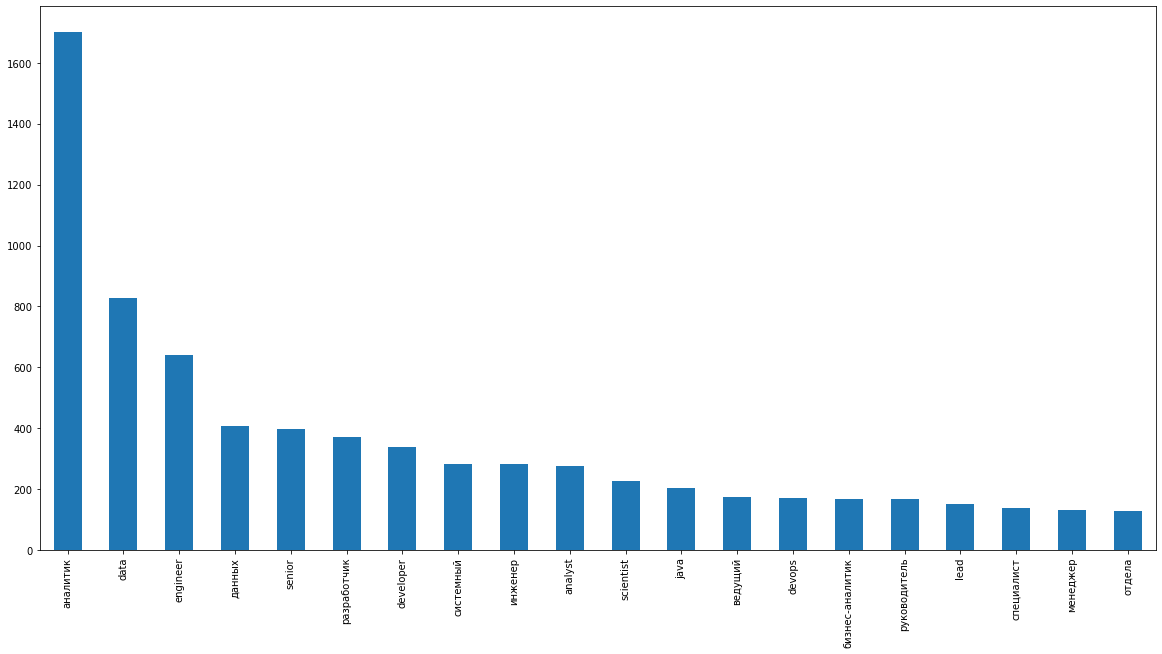

In [104]:
d.plot(kind='bar', figsize=( 20 , 10 ))

In [105]:
# задача 2. топ 3 скила для разных уровней подготовки 

In [106]:
df['levels'].value_counts()

От 1 года до 3 лет                                   2235
От 3 до 6 лет                                        1710
Средний (Middle)                                      453
Старший (Senior)                                      362
[]                                                    307
Нет опыта                                             275
Более 6 лет                                           165
Not indicated                                         110
Ведущий (Lead)                                         72
['Senior']                                             61
['Middle', 'Senior']                                   50
['Middle']                                             31
Младший (Junior)                                       22
['Lead']                                               19
['Junior']                                             15
['Руководитель']                                       13
['Senior', 'Middle']                                   12
['Senior', 'Le

In [107]:
df['levels'] = df['levels'].apply(lambda x: x.replace('\'', ''))

In [108]:
df['levels'].value_counts()

От 1 года до 3 лет                         2235
От 3 до 6 лет                              1710
Средний (Middle)                            453
Старший (Senior)                            362
[]                                          307
Нет опыта                                   275
Более 6 лет                                 165
Not indicated                               110
Ведущий (Lead)                               72
[Senior]                                     61
[Middle, Senior]                             50
[Middle]                                     31
Младший (Junior)                             22
[Lead]                                       19
[Junior]                                     15
[Руководитель]                               13
[Senior, Middle]                             12
[Senior, Lead]                               11
От 1 года                                    10
[Junior, Middle]                              7
[Junior, Middle, Senior]                

In [109]:
# разбиение: при совместно попадании нескольких уровней,  отношу к нижнему 
# остальные случаи на усмотрение автора

In [110]:
#junior - "Нет опыта", "[]", "Not indicated", "Младший (Junior)", "['Junior']", "['Junior', 'Middle']", "['Junior', 'Middle', 'Senior']", "Стажёр (Intern)", "['Manager']", "Без опыта", "['Senior', 'Middle', 'Junior']", "['Middle', 'Senior', 'Junior']", "['Стажёр']", "['Junior', 'Senior']", "['Manager', 'Junior']", "['Senior', 'Junior']", "['Senior', 'Middle', 'Manager', 'Junior', 'Lead']", "['Менеджер']", "['Junior', 'Middle', 'Руководитель']", "['Junior', 'Lead', 'Middle']" 
#middle - "От 1 года до 3 лет", "Средний (Middle)", "['Middle', 'Senior']", "['Middle']", ['Senior', 'Middle'], "От 1 года", "['Middle', 'Senior', 'Lead']", "['Middle', 'Manager', 'Head']", "['Senior', 'Middle', 'Lead']", "['Middle', 'Senior', 'Manager']"
#senior - "От 3 до 6 лет", "Старший (Senior)", "['Senior']", "['Senior', 'Lead']", "От 3 лет ", "['Lead', 'Senior']", "['Senior', 'Head']", "['Senior', 'Lead', 'Руководитель']", "['Senior', 'Руководитель', 'Director', 'Head']", "['Senior', 'Middle', 'Junior']", "['Head', 'Senior']" "['Senior', 'Manager']"   
#lead - "Более 6 лет", "Ведущий (Lead)", "['Lead']", "['Руководитель']", "['Head']", "['Lead', 'Head']", "['President']", "['Manager', 'Руководитель']"   

In [111]:
df_jun = df.query('levels == "Нет опыта" or levels == "[]" or levels == "Not indicated" or levels == "Младший (Junior)" or levels == "[Junior]" or levels == "[Junior, Middle]" or levels == "[Junior, Middle, Senior]" or levels == "Стажёр (Intern)" or levels == "[Manager]" or levels == "Без опыта" or levels == "[Senior, Middle, Junior]" or levels == "[Middle, Senior, Junior]" or levels == "[Стажёр]" or levels == "[Junior, Senior]" or levels == "[Manager, Junior]" or levels == "[Senior, Junior]" or levels == "[Senior, Middle, Manager, Junior, Lead]" or levels == "[Менеджер]" or levels == "[Junior, Middle, Руководитель]" or levels == "[Junior, Lead, Middle]"')

In [112]:
df_mid = df.query('levels == "От 1 года до 3 лет" or levels == "Средний (Middle)" or levels == "[Middle, Senior]" or levels == "[Middle]" or levels == "[Senior, Middle]" or levels == "От 1 года" or levels == "[Middle, Senior, Lead]" or levels == "[Middle, Manager, Head]" or levels == "[Senior, Middle, Lead]" or levels == "[Middle, Senior, Manager]"')

In [113]:
df_sen = df.query('levels == "От 3 до 6 лет" or levels == "Старший (Senior)" or levels == "[Senior]" or levels == "[Senior, Lead]" or levels == "От 3 лет " or levels == "[Lead, Senior]" or levels == "[Senior, Head]" or levels == "[Senior, Lead, Руководитель]" or levels == "[Senior, Руководитель, Director, Head]" or levels == "[Senior, Middle, Junior]" or levels == "[Head, Senior]" or levels == "[Senior, Manager]"')

In [114]:
df_lead = df.query('levels == "Более 6 лет" or levels == "Ведущий (Lead)" or levels == "[Lead]" or levels == "[Руководитель]" or levels == "[Head]" or levels == "[Lead, Head]" or levels == "[President]" or levels == "[Manager, Руководитель]"')

In [115]:
from IPython.display import clear_output
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)

In [116]:
# принимает: 
# 'dfs' - список с таблицами
# 'captions' - подписи к таблицам
# 'space_width' - отступы между таблицами

# возвращает:
# выводит в консоль таблицы рядом с друг другом

def display_side_by_side(dfs:list, captions:list, space_width=10):
    output = ""
    combined = dict(zip(captions, dfs))
    
    for caption, df in combined.items():
        output += (df.style.set_properties(**{'text-align': 'left'})
                   .set_table_attributes("style='display:inline'")
                   .set_caption(caption)._repr_html_())
        output += "\xa0" * space_width
    
    display(HTML(output))

In [117]:
def top_skills(df):
    # преводим ключевые навыки из Series в List
    skills_df = df['techstack'].to_list()
    # список для всех ключевых навыков со всех вакансий
    skills = []
    # заполняем список всех ключевых навыков
    for skill in skills_df:
        if skill == skill:
            for el in skill[1:-1].split(', '):
                if el != '':
                    skills.append(re.sub('\'', '', el.lower()))

    # выбираем все уникальные значения ключевых навыков
    set_skills = set(skills)
    # создаем словарь с уникальными словами и их количеством повторений
    dct_skills = {el:skills.count(el) for el in set_skills}
    # сортируем данные
    srt_skills = dict(sorted(dct_skills.items(), key=lambda x: x[1], reverse=True))
    # взращаем осортированные данные (ключевой навых - количество повторений)
    return pd.Series(srt_skills, name='skills')

In [118]:
top_skills_jun = top_skills(df_jun)
top_skills_mid  = top_skills(df_mid)
top_skills_sen = top_skills(df_sen)
top_skills_lead = top_skills(df_lead)

In [119]:
count = 3

skj = top_skills_jun.head(count)
skm = top_skills_mid.head(count)
sks = top_skills_sen.head(count)

display_side_by_side([pd.DataFrame({'skills':skj.index, 'count':skj.values})],
                     ['Top skills junior:'], 10) 

,skills,count
0,python,187
1,sql,174
2,анализ данных,71


In [120]:
skm = top_skills_mid.head(count)

display_side_by_side([pd.DataFrame({'skills':skm.index, 'count':skm.values})],
                     ['Top skills middle:'], 10) 

,skills,count
0,sql,1110
1,python,754
2,аналитическое мышление,483


In [121]:
sks = top_skills_sen.head(count)

display_side_by_side([pd.DataFrame({'skills':sks.index, 'count':sks.values})],
                     ['Top skills senior:'], 10) 

,skills,count
0,sql,838
1,python,642
2,postgresql,263


In [122]:
skl = top_skills_lead.head(count)

display_side_by_side([pd.DataFrame({'skills':skl.index, 'count':skl.values})],
                     ['Top skills lead:'], 10) 

,skills,count
0,python,72
1,sql,65
2,английский язык,42
